In [1]:
import sys
%load_ext autoreload
sys.path.append('..')

In [2]:
%autoreload 2
from FEMOL import RectangleQuadMesh, FEM_Problem, TOPOPT_Problem
from FEMOL_utils import *

# MMB Beam Topology Optimization

### Topology optimization variables and quadrilateral mesh

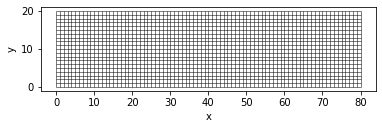

In [7]:
nelx = 80 # elements in the x direction
nely = 20 # elements in the y direction
volfrac = 0.35 # Volume fraction of material

# Creating the mesh
Lx = nelx
Ly = nely

mesh = RectangleQuadMesh(Lx, Ly, nelx, nely)
mesh.plot()

## Formulating the MMB FEM Problem

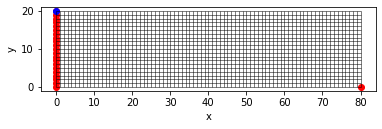

In [8]:
# distributing the material to the initial volume fraction
X = np.ones(nelx*nely)*volfrac  
penal=3

# Material proprieties
E = 1
nu = 0.3
t = 1 # thickness

# Creating the FEM Problem
Problem = FEM_Problem(mesh) # initialize the problem
Problem.isotropic_plane_stress_tensor(E, nu, t) # Define the stiffness tensor
Problem.get_plane_stress_Ke() # Get the element stiffness matrix (constant for every element)

# Boundary condition domains :

# x is fixed and y is free at x = 0 and y = [0, Ly]
x = [0]
y = [[0, Ly]]
middle_domain = create_domain(x, y)

# y is fixed and x is free at x = Lx and y = 0
x = [Lx]
y = [0]
left_domain = create_domain(x, y)

# Domain where the down force is applied
x = [0]
y = [Ly]
force_domain = create_domain(x, y)

# Defining the force
force = [[0, -1]]


Problem.assemble_1_material_topopt(X, penal)
Problem.add_fixed_domain(middle_domain, ddls = [0])
Problem.add_fixed_domain(left_domain, ddls=[1])
Problem.add_forces(force, [force_domain])
Problem.fix_boundary()
Problem.plot()

## Solving the topology optimisation problem

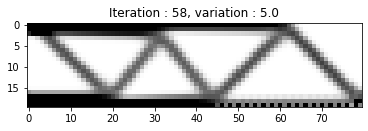

In [9]:
TOPOPT = TOPOPT_Problem(Problem, volfrac=volfrac)
TO_Results = TOPOPT.solve(converge=0.05)

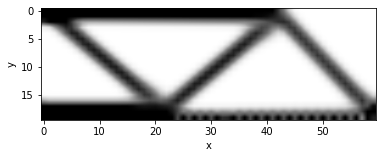

In [9]:
TO_Results.plot()

## Create an animation from the results

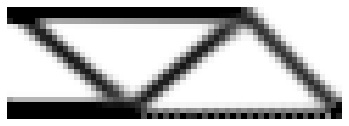

In [10]:
TO_Results.animate('MMB_Beam')